# THE SPARKS FOUNDATION 
**Data Science & Business Analytics**

## Task-3: Prediction using Decision Tree Algorithm

From the given 'Iris' datset, create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

*Author* : **RAHUL KUMAR**

### 1. Importing important packages and libraries ###

In [1]:
# Importing necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import plot_tree


### 2. Importing the given dataset and printing its values ###

In [2]:
url = 'D:\AI or Data Science Internships\The Sparks Foundaion\Task-3 (Decision Tree)\Iris.csv'
dataset = pd.read_csv(url)
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 3. Exploratory Data Analysis ###

In [3]:
print("\nData size :",dataset.shape)
print("\nNumber of records :",len(dataset))
print("\nNumber of atrributes :",len(dataset.columns))
dataset.describe()


Data size : (150, 6)

Number of records : 150

Number of atrributes : 6


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# check if there are any missing values in the dataframe?
print(dataset.isnull())
print(" \nCount total number of missing values in a DataFrame : \n\n", dataset.isnull().sum().sum())

        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]
 
Count total number of missing values i

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


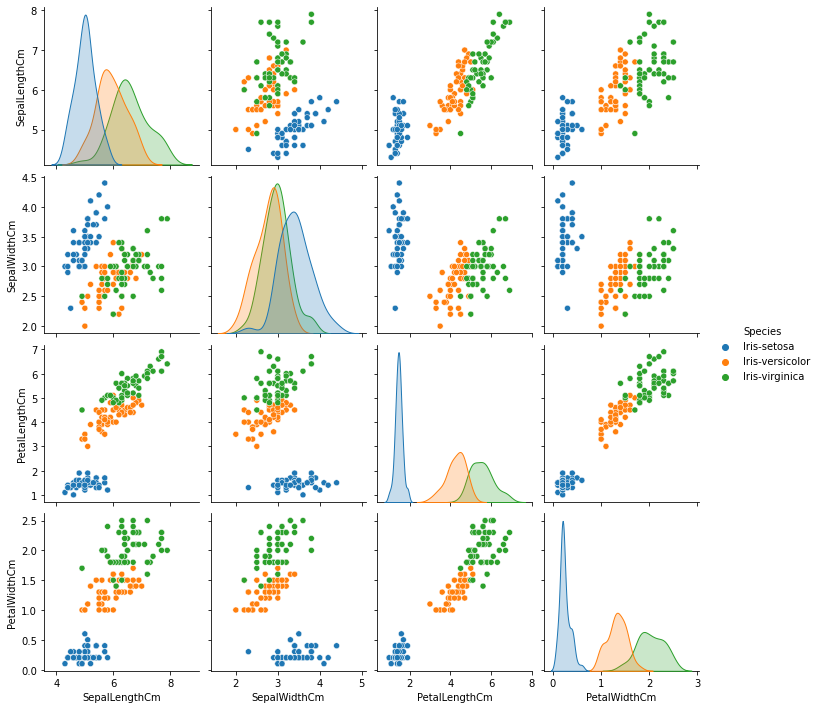

In [5]:
dataset.drop('Id',axis=1,inplace=True)
print(dataset.head())
sns.pairplot(dataset, hue = 'Species')

From the above graphs we can conclude that 'Iris-setosa' always forms a distinct cluster from the other two, while 'Iris-versicolor' & 'iris-virginica' species overlap a bit with each other.

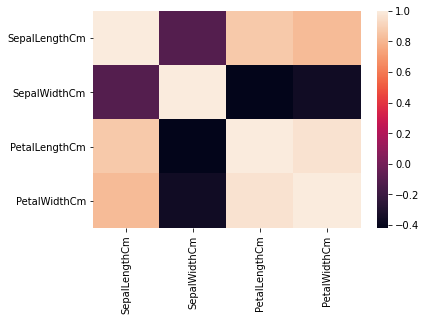

In [6]:
# correlation matrix of iris dataset

sns.heatmap(dataset.corr())
plt.savefig("IrisDTheatmap.png")

We can observe the following from the heatmap:
1. Petal length is highly related to petal width.
2. Sepal length is not related to sepal width.

In [7]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 4. Data Preprocessing  ###
 

In [8]:
target = dataset['Species']
df = dataset.copy()
df = df.drop('Species', axis =1)
df.shape

(150, 4)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
# Defining the attributes
X= df

# selected 4th column for Y, species as output or target feature 
Y= target

label = preprocessing.LabelEncoder()

Y= label.fit_transform(target)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 5. Decision Tree Algorithm ###

In [12]:
# Splitting data in 80:20 ratio, 80% will be training set and 20% will be test set 
validation_size= 0.20 

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= validation_size) 

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


Training split input-  (120, 4)
Testing split input-  (30, 4)


After splitting the dataset we have 120 records (rows) for training and 30 records for testing purposes

In [13]:
# creating a decision tree classifier
DT= DecisionTreeClassifier() 

# training the model on the training dataset & 'fit' function is used to train the model using the training sets as parameters
DT= DT.fit(X_train, Y_train) 

# performing predictions on the test dataset
y_predict= DT.predict(X_test)

### 6. Evaluating the Algorithm ###

In [14]:
print('Accuracy of the model is:',accuracy_score(Y_test, y_predict))
print('Mean absolute error of the model is:',mean_absolute_error(Y_test, y_predict))

Accuracy of the model is: 0.9666666666666667
Mean absolute error of the model is: 0.03333333333333333


In [15]:
print(confusion_matrix(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Accuracy Score: 0.9666666666666667')

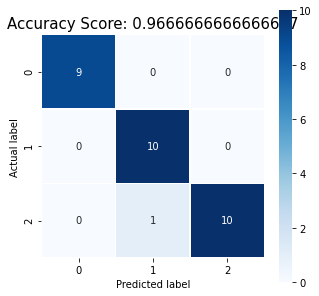

In [16]:
cm = confusion_matrix(Y_test, y_predict)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(DT.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)

### 7. Visualizing the Decision Tree Model ###

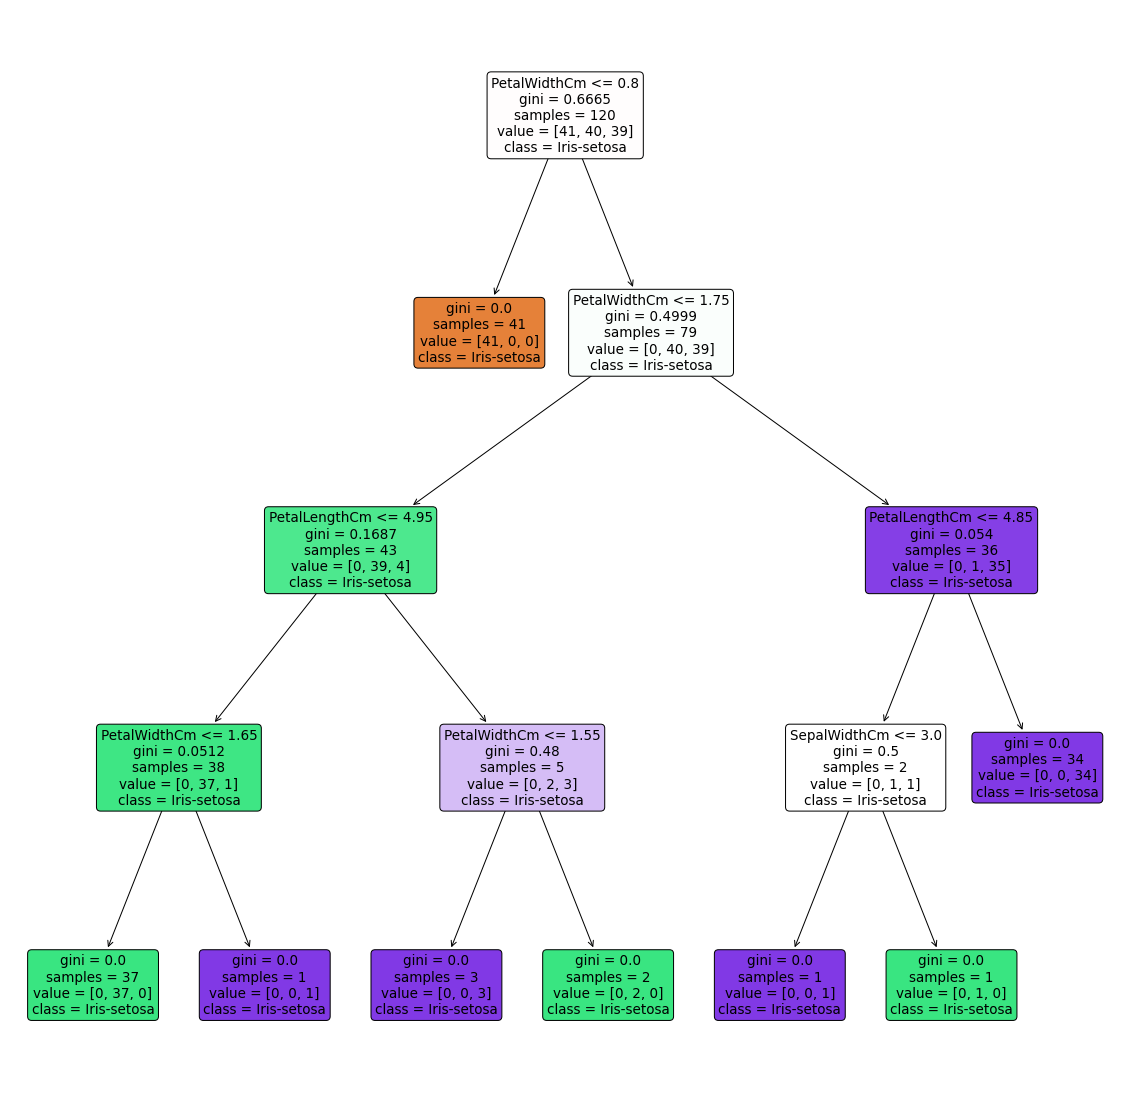

In [17]:
# Visualizing the graph

plt.figure(figsize = (20,20))

dec_tree = plot_tree(DT, feature_names = df.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True)

In the above decision tree chart, each internal node has a decision rule that splits the data. 'Gini' referred as 'Gini ratio', which measures the impurity of the node.

**I have successfully created a Decision Tree classifier which can predict the right class according to the data that is fed to the classifier.**